# SG Education 

In [1]:
#imports for use
import pandas as pd
from functools import reduce
import numpy as np

## Student Pass Percentages

In [2]:
#set dataframes for each csv
df_3o = pd.read_csv(r'C:\Users\Swill\data\SG_Education\DATA\percentage-of-students-with-at-least-3-o-level-passes.csv')
df_5o = pd.read_csv(r'C:\Users\Swill\data\SG_Education\DATA\percentage-of-students-with-at-least-5-o-level-passes.csv')
df_math = pd.read_csv(r'C:\Users\Swill\data\SG_Education\DATA\percentage-of-gce-o-level-students-who-passed-mathematics.csv')
df_eng = pd.read_csv(r'C:\Users\Swill\data\SG_Education\DATA\percentage-of-gce-o-level-students-who-passed-english-language.csv')
df_mtl = pd.read_csv(r'C:\Users\Swill\data\SG_Education\DATA\percentage-of-gce-o-level-students-who-passed-mtl.csv')

In [3]:
#cast year as string for clean
df_3o["year"] = df_3o["year"].astype(str)

#drop all rows not equal to overall, not using race breakdown 
df_3o = df_3o.drop(df_3o[df_3o.race != 'Overall'].index)

#drop all rows before 1997 to align datasets
df_3o = df_3o.drop(df_3o[df_3o.year < '1997'].index)

#cast year as string for clean
df_5o["year"] = df_5o["year"].astype(str)

#drop all rows not equal to overall, not using race breakdown 
df_5o = df_5o.drop(df_5o[df_5o.race != 'Overall'].index)

#drop all rows before 1997 to align datasets
df_5o = df_5o.drop(df_5o[df_5o.year < '1997'].index)

#cast year as string for simple merge
df_math["year"] = df_math["year"].astype(str)

#drop all rows not equal to overall, not using race breakdown 
df_math = df_math.drop(df_math[df_math.race != 'Overall'].index)

#cast year as string for simple merge
df_eng["year"] = df_eng["year"].astype(str)

#drop all rows not equal to overall, not using race breakdown 
df_eng = df_eng.drop(df_eng[df_eng.race != 'Overall'].index)

#cast year as string for simple merge
df_mtl["year"] = df_mtl["year"].astype(str)

#drop all rows not equal to overall, not using race breakdown 
df_mtl = df_mtl.drop(df_mtl[df_mtl.race != 'Overall'].index)

In [4]:
#merge dataframes to form education pass percentage dataframe
merged_pass_perc = df_3o.merge(df_5o).merge(df_math).merge(df_eng).merge(df_mtl)

#drop race column
merged_pass_perc.drop('race', axis=1, inplace=True)

In [5]:
merged_pass_perc

,year,percentage_3_olevel_passes,percentage_5_olevel_passes,percentage_pass_math,percentage_pass_eng,percentage_pass_mtl
0,1997,90.3,72.7,85.2,69.4,95.0
1,1998,91.1,74.0,84.9,70.2,93.7
2,1999,92.1,76.3,86.3,73.8,94.4
3,2000,92.3,77.8,87.1,76.3,94.6
4,2001,93.5,80.0,86.6,79.8,96.2
5,2002,94.2,80.0,87.5,81.4,96.5
6,2003,94.7,81.6,87.7,84.1,97.4
7,2004,95.0,82.7,89.0,85.0,95.5
8,2005,95.4,81.1,88.3,86.0,96.0
9,2006,95.2,82.0,88.4,86.5,98.1


In [6]:
#write to csv
merged_pass_perc.to_csv(r'C:\Users\Swill\data\SG_Education\education-pass-percentage.csv', index=False)

## Pupils per Teacher in Schools

In [7]:
#set dataframes for each csv
df_ppt_primary = pd.read_csv(r'C:\Users\Swill\data\SG_Education\DATA\pupils-per-teacher-in-primary-schools.csv')
df_ppt_secondary = pd.read_csv(r'C:\Users\Swill\data\SG_Education\DATA\pupils-per-teacher-in-secondary-schools.csv')

In [8]:
#cast year as string for clean
df_ppt_primary["year"] = df_ppt_primary["year"].astype(str)

#drop all rows before 1997 to align datasets
df_ppt_primary = df_ppt_primary.drop(df_ppt_primary[df_ppt_primary.year < '1997'].index)

#cast year as string for clean
df_ppt_secondary["year"] = df_ppt_secondary["year"].astype(str)

#drop all rows before 1997 to align datasets
df_ppt_secondary = df_ppt_secondary.drop(df_ppt_secondary[df_ppt_secondary.year < '1997'].index)

In [9]:
#merge dataframes to add vice principal data
merged_ppt = df_ppt_primary.merge(df_ppt_secondary)

merged_ppt.rename(columns={'primary_students_to_teaching_staff': 'primary_students_to_teacher'}, inplace=True)
merged_ppt.rename(columns={'sec_pupil_to_teacher': 'secondary_students_to_teacher'}, inplace=True)

In [10]:
merged_ppt

,year,primary_students_to_teacher,secondary_students_to_teacher
0,1997,26.5,19.8
1,1998,26.3,20.1
2,1999,26.6,19.4
3,2000,25.6,19.2
4,2001,25.1,19.6
5,2002,24.4,18.9
6,2003,24.9,19.1
7,2004,24.3,19.0
8,2005,23.5,18.5
9,2006,22.6,18.4


In [11]:
#write to csv
merged_ppt.to_csv(r'C:\Users\Swill\data\SG_Education\pupils-per-teacher.csv', index=False)

## Class Size

In [12]:
#set dataframes for each csv
df_class_size = pd.read_csv(r'C:\Users\Swill\data\SG_Education\DATA\number-of-classes-and-class-size-by-level.csv')

In [13]:
#cast year as string for clean
df_class_size["year"] = df_class_size["year"].astype(str)

#drop all rows before 1997 to align datasets
df_class_size = df_class_size.drop(df_class_size[df_class_size.year < '1997'].index)

#drop all rows except Alls
df_class_size = df_class_size.drop(df_class_size[df_class_size.level != 'All'].index)

#drop race column
df_class_size.drop('level', axis=1, inplace=True)

In [14]:
df_class_size

,year,level_of_education,no_of_classes,ave_class_size
285,1997,Primary,7473,37.5
294,1997,Secondary,5417,34.6
300,1997,Pre-University,966,23.2
304,1998,Primary,7684,37.5
313,1998,Secondary,5217,34.3
...,...,...,...,...
688,2018,Primary,7089,33.1
695,2018,Secondary,4890,33.8
701,2019,Pre-University,1187,23.2
705,2019,Primary,7123,33.0


In [15]:
#make three dataframes then merge to flatten across year
#create Primary
df_class_size_pri = df_class_size.drop(df_class_size[df_class_size.level_of_education != 'Primary'].index)
df_class_size_pri.rename(columns={'no_of_classes': 'primary_no_of_classes', 'ave_class_size': 'primary_average_class_size'}, inplace=True)
df_class_size_pri.drop('level_of_education', axis=1, inplace=True)

#create secondary
df_class_size_sec = df_class_size.drop(df_class_size[df_class_size.level_of_education != 'Secondary'].index)
df_class_size_sec.rename(columns={'no_of_classes': 'secondary_no_of_classes', 'ave_class_size': 'secondary_average_class_size'}, inplace=True)
df_class_size_sec.drop('level_of_education', axis=1, inplace=True)

#create pre University
df_class_size_preU = df_class_size.drop(df_class_size[df_class_size.level_of_education != 'Pre-University'].index)
df_class_size_preU.rename(columns={'no_of_classes': 'preUniversity_no_of_classes', 'ave_class_size': 'preUniversity_average_class_size'}, inplace=True)
df_class_size_preU.drop('level_of_education', axis=1, inplace=True)

#merge to complete dataframe
merged_class_size = df_class_size_pri.merge(df_class_size_sec).merge(df_class_size_preU)


In [16]:
merged_class_size

,year,primary_no_of_classes,primary_average_class_size,secondary_no_of_classes,secondary_average_class_size,preUniversity_no_of_classes,preUniversity_average_class_size
0,1997,7473,37.5,5417,34.6,966,23.2
1,1998,7684,37.5,5217,34.3,989,24.0
2,1999,8061,37.2,4988,34.7,1036,24.2
3,2000,8196,37.3,4988,35.3,1056,23.7
4,2001,8088,37.4,5235,35.9,1052,23.4
5,2002,8040,37.6,5381,36.2,1092,23.4
6,2003,7944,37.8,5650,36.5,1090,22.5
7,2004,7873,37.7,5821,36.7,1107,22.3
8,2005,8036,36.1,5837,36.5,1253,23.1
9,2006,8235,34.6,5904,36.4,1336,23.0


In [17]:
#write to csv
merged_class_size.to_csv(r'C:\Users\Swill\data\SG_Education\class-size.csv', index=False)

## Government Expenditure on Education

In [18]:
#set dataframes for each csv
df_gov_Exp = pd.read_csv(r'C:\Users\Swill\data\SG_Education\DATA\government-recurrent-expenditure-on-education-per-student.csv')

In [19]:
#cast year as string for clean
df_gov_Exp["year"] = df_gov_Exp["year"].astype(str)

#drop all rows before 1997 to align datasets
df_gov_Exp = df_gov_Exp.drop(df_gov_Exp[df_gov_Exp.year < '1997'].index)

df_gov_Exp = df_gov_Exp.loc[~((df_gov_Exp['type_of_educational_institution']=='Publicly-funded full-time diploma courses') |
                           (df_gov_Exp['type_of_educational_institution']=="Publicly-funded full-time degree courses") |
                          (df_gov_Exp['type_of_educational_institution']=="Full-time Nitec / Higher Nitec courses") |
                          (df_gov_Exp['type_of_educational_institution']=="Institute of Technical Education") |
                           (df_gov_Exp['type_of_educational_institution']=="Polytechnics") |
                           (df_gov_Exp['type_of_educational_institution']=="Universities"))]

#change Junior Colleges/Centralised Institutes to Pre-University
df_gov_Exp['type_of_educational_institution'] = df_gov_Exp['type_of_educational_institution'].str.replace('Junior Colleges/Centralised Institutes','Pre-University')


In [20]:
#make three dataframes then merge to flatten across year
#create Primary
df_gov_Exp_pri = df_gov_Exp.drop(df_gov_Exp[df_gov_Exp.type_of_educational_institution != 'Primary Schools'].index)
df_gov_Exp_pri.rename(columns={'expenditure_per_student': 'primary_expenditure_per_student'}, inplace=True)
df_gov_Exp_pri.drop('type_of_educational_institution', axis=1, inplace=True)

#create secondary
df_gov_Exp_sec = df_gov_Exp.drop(df_gov_Exp[df_gov_Exp.type_of_educational_institution != 'Secondary Schools'].index)
df_gov_Exp_sec.rename(columns={'expenditure_per_student': 'secondary_expenditure_per_student'}, inplace=True)
df_gov_Exp_sec.drop('type_of_educational_institution', axis=1, inplace=True)

#create Primary
df_gov_Exp_preU = df_gov_Exp.drop(df_gov_Exp[df_gov_Exp.type_of_educational_institution != 'Pre-University'].index)
df_gov_Exp_preU.rename(columns={'expenditure_per_student': 'preUniversity_expenditure_per_student'}, inplace=True)
df_gov_Exp_preU.drop('type_of_educational_institution', axis=1, inplace=True)

#merge to complete dataframe
merged_gov_Exp = df_gov_Exp_pri.merge(df_gov_Exp_sec).merge(df_gov_Exp_preU)

In [21]:
merged_gov_Exp

,year,primary_expenditure_per_student,secondary_expenditure_per_student,preUniversity_expenditure_per_student
0,1997,2960,4469,7052
1,1998,2808,4472,6346
2,1999,2612,4409,6325
3,2000,3137,5104,7304
4,2001,3363,5304,7879
5,2002,3535,5614,8497
6,2003,3508,5437,8791
7,2004,3575,5746,8850
8,2005,3820,5793,9445
9,2006,4243,6246,10161


In [22]:
#write to csv
merged_gov_Exp.to_csv(r'C:\Users\Swill\data\SG_Education\gov-expenditure.csv', index=False)

## Government Reccurent Expenditure on Education

In [23]:
#set dataframes for each csv
df_gov_Ed_Exp = pd.read_csv(r'C:\Users\Swill\data\SG_Education\DATA\government-expenditure-on-education.csv')

In [24]:
#cast year as string for clean
df_gov_Ed_Exp["year"] = df_gov_Ed_Exp["year"].astype(str)

#drop all rows before 1997 to align datasets
df_gov_Ed_Exp = df_gov_Ed_Exp.drop(df_gov_Ed_Exp[df_gov_Ed_Exp.year < '1997'].index)

In [25]:
df_gov_Ed_Exp

,year,recurrent_expenditure_total
16,1997,3347775
17,1998,3167425
18,1999,3256874
19,2000,4276896
20,2001,4766584
21,2002,4824395
22,2003,4996791
23,2004,4974724
24,2005,5215299
25,2006,6351717


In [26]:
#write to csv
df_gov_Ed_Exp.to_csv(r'C:\Users\Swill\data\SG_Education\gov-ed-expenditure.csv', index=False)

## Government Development Expediture on Education

In [27]:
#set dataframes for each csv
df_gov_devExp = pd.read_csv(r'C:\Users\Swill\data\SG_Education\DATA\government-development-expenditure-on-education.csv')

In [28]:
#cast year as string for clean
df_gov_devExp["year"] = df_gov_devExp["year"].astype(str)

#drop all rows before 1997 to align datasets
df_gov_devExp = df_gov_devExp.drop(df_gov_devExp[df_gov_devExp.year < '1997'].index)

df_gov_devExp = df_gov_devExp.loc[~((df_gov_devExp['type_of_educational_institutions']=='Others') |
                           (df_gov_devExp['type_of_educational_institutions']=="Special Education") |
                          (df_gov_devExp['type_of_educational_institutions']=="Institute of Technical Education") |
                           (df_gov_devExp['type_of_educational_institutions']=="Polytechnics") |
                           (df_gov_devExp['type_of_educational_institutions']=="Universities"))]

#change Junior Colleges/Centralised Institutes to Pre-University
df_gov_devExp['type_of_educational_institutions'] = df_gov_devExp['type_of_educational_institutions'].str.replace('Junior Colleges / Centralised Institute','Pre-University')


In [29]:
#make three dataframes then merge to flatten across year
#create Primary
df_gov_devExp_pri = df_gov_devExp.drop(df_gov_devExp[df_gov_devExp.type_of_educational_institutions != 'Primary Schools'].index)
df_gov_devExp_pri.rename(columns={'development_expenditure': 'primary_development_expenditure'}, inplace=True)
df_gov_devExp_pri.drop('type_of_educational_institutions', axis=1, inplace=True)

#create secondary
df_gov_devExp_sec = df_gov_devExp.drop(df_gov_devExp[df_gov_devExp.type_of_educational_institutions != 'Secondary Schools'].index)
df_gov_devExp_sec.rename(columns={'development_expenditure': 'secondary_development_expenditure'}, inplace=True)
df_gov_devExp_sec.drop('type_of_educational_institutions', axis=1, inplace=True)

#create pre university
df_gov_devExp_preU = df_gov_devExp.drop(df_gov_devExp[df_gov_devExp.type_of_educational_institutions != 'Pre-University'].index)
df_gov_devExp_preU.rename(columns={'development_expenditure': 'preUniversity_development_expenditure'}, inplace=True)
df_gov_devExp_preU.drop('type_of_educational_institutions', axis=1, inplace=True)

#create MOE HQ
df_gov_devExp_moe = df_gov_devExp.drop(df_gov_devExp[df_gov_devExp.type_of_educational_institutions != 'MOE HQ'].index)
df_gov_devExp_moe.rename(columns={'development_expenditure': 'moe_development_expenditure'}, inplace=True)
df_gov_devExp_moe.drop('type_of_educational_institutions', axis=1, inplace=True)

#create National institute of education
df_gov_devExp_nie = df_gov_devExp.drop(df_gov_devExp[df_gov_devExp.type_of_educational_institutions != 'National Institute of Education'].index)
df_gov_devExp_nie.rename(columns={'development_expenditure': 'natInstitute_development_expenditure'}, inplace=True)
df_gov_devExp_nie.drop('type_of_educational_institutions', axis=1, inplace=True)

#merge to complete dataframe
merged_gov_devExp = df_gov_devExp_pri.merge(df_gov_devExp_sec).merge(df_gov_devExp_preU).merge(df_gov_devExp_moe).merge(df_gov_devExp_nie)

In [30]:
merged_gov_devExp

,year,primary_development_expenditure,secondary_development_expenditure,preUniversity_development_expenditure,moe_development_expenditure,natInstitute_development_expenditure
0,1997,117978.0,228079.0,13967.0,205675.0,1010.0
1,1998,211942.0,352908.0,6114.0,454953.0,111.0
2,1999,237624.0,315929.0,75722.0,421409.0,2168.0
3,2000,383822.0,249509.0,73891.0,279507.0,11318.0
4,2001,444755.0,232211.0,66530.0,173612.0,11286.0
5,2002,368489.0,272914.0,89749.0,182329.0,7699.0
6,2003,195005.0,284099.0,41513.0,43497.0,200.0
7,2004,125777.0,233314.0,64569.0,42304.0,2890.0
8,2005,72258.0,131273.0,46232.0,44835.0,0.0
9,2006,78447.0,104640.0,14811.0,42425.0,0.0


In [31]:
#write to csv
merged_gov_devExp.to_csv(r'C:\Users\Swill\data\SG_Education\gov-dev-expenditure.csv', index=False)

## Number of Students

In [32]:
#set dataframes for each csv
df_num_pri = pd.read_csv(r'C:\Users\Swill\data\SG_Education\DATA\students-and-teachers-primary-schools.csv')
df_num_sec = pd.read_csv(r'C:\Users\Swill\data\SG_Education\DATA\students-and-teachers-secondary-schools.csv')
df_num_preUni = pd.read_csv(r'C:\Users\Swill\data\SG_Education\DATA\students-and-teachers-pre-university.csv')

In [33]:
#cast year as string for clean
df_num_pri["year"] = df_num_pri["year"].astype(str)

#drop all rows before 1997 to align datasets
df_num_pri = df_num_pri.drop(df_num_pri[df_num_pri.year < '1997'].index)

#cast year as string for clean
df_num_sec["year"] = df_num_sec["year"].astype(str)

#drop all rows before 1997 to align datasets
df_num_sec = df_num_sec.drop(df_num_sec[df_num_sec.year < '1997'].index)

#cast year as string for clean
df_num_preUni["year"] = df_num_preUni["year"].astype(str)

#drop all rows before 1997 to align datasets
df_num_preUni = df_num_preUni.drop(df_num_preUni[df_num_preUni.year < '1997'].index)

df_num_preUni.teachers_preu = pd.to_numeric(df_num_preUni.teachers_preu, errors='coerce').astype('Int64')
df_num_preUni.students_preu = pd.to_numeric(df_num_preUni.students_preu, errors='coerce').astype('Int64')

In [34]:
#create list of dataframes for merge
dfs = [df_num_pri, df_num_sec, df_num_preUni]

#merge based on year, sex, school_type fill 0 where no value exists
df_Num_s_t = reduce(lambda  left,right: pd.merge(left,right,on=['year','sex','school_type'], how='outer'), dfs).fillna(0)

#remove unnecessary rows of school types outside government schools recorded after 2008
df_Num_s_t = df_Num_s_t.loc[~((df_Num_s_t['school_type']=='Auto') |
                           (df_Num_s_t['school_type']=="Indep") |
                          (df_Num_s_t['school_type']=="Independent") |
                           (df_Num_s_t['school_type']=="Specialised Independant") |
                              (df_Num_s_t['school_type']=="Specialised") |
                           (df_Num_s_t['school_type']=="Specialised Indep"))]

#sum school type by year together 
df_Num_s_t = df_Num_s_t.groupby(['year']).sum().reset_index()

#rename columns for neatness
df_Num_s_t.rename(columns={'students_pri': 'primary_no_of_students'}, inplace=True)
df_Num_s_t.rename(columns={'teachers_pri': 'primary_no_of_teachers'}, inplace=True)
df_Num_s_t.rename(columns={'student_sec': 'secondary_no_of_students'}, inplace=True)
df_Num_s_t.rename(columns={'teacher_sec': 'secondary_no_of_teachers'}, inplace=True)
df_Num_s_t.rename(columns={'students_preu': 'preUniversity_no_of_students'}, inplace=True)
df_Num_s_t.rename(columns={'teachers_preu': 'preUniversity_no_of_teachers'}, inplace=True)

df_Num_s_t["preUniversity_no_of_teachers"] = df_Num_s_t["preUniversity_no_of_teachers"].astype(float)

In [35]:
df_Num_s_t

,year,primary_no_of_students,primary_no_of_teachers,secondary_no_of_students,secondary_no_of_teachers,preUniversity_no_of_students,preUniversity_no_of_teachers
0,1997,414708.0,18943.0,219647.0,12982.0,34374,2460.0
1,1998,426746.0,18779.0,207462.0,12355.0,36409,2824.0
2,1999,444478.0,20266.0,198584.0,11758.0,38428,2944.0
3,2000,453112.0,21512.0,202520.0,12068.0,38310,2991.0
4,2001,448524.0,21885.0,214564.0,12459.0,37546,2970.0
5,2002,448527.0,22598.0,218711.0,13226.0,39116,3171.0
6,2003,444645.0,21976.0,233341.0,13722.0,37765,3239.0
7,2004,439355.0,22360.0,240928.0,13979.0,35222,3389.0
8,2005,430188.0,22586.0,238050.0,14250.0,38621,3516.0
9,2006,421562.0,23040.0,238397.0,14318.0,40222,3458.0


In [36]:
#write to csv
df_Num_s_t.to_csv(r'C:\Users\Swill\data\SG_Education\number-students-teachers.csv', index=False)

## Create SG Education Dataframe for analysis

In [37]:
#merge all prepared dataframes by year
df_sge = merged_pass_perc.merge(merged_ppt).merge(merged_class_size).merge(df_Num_s_t).merge(merged_gov_Exp).merge(df_gov_Ed_Exp).merge(merged_gov_devExp)

In [38]:
df_sge

,year,percentage_3_olevel_passes,percentage_5_olevel_passes,percentage_pass_math,percentage_pass_eng,percentage_pass_mtl,primary_students_to_teacher,secondary_students_to_teacher,primary_no_of_classes,primary_average_class_size,...,preUniversity_no_of_teachers,primary_expenditure_per_student,secondary_expenditure_per_student,preUniversity_expenditure_per_student,recurrent_expenditure_total,primary_development_expenditure,secondary_development_expenditure,preUniversity_development_expenditure,moe_development_expenditure,natInstitute_development_expenditure
0,1997,90.3,72.7,85.2,69.4,95.0,26.5,19.8,7473,37.5,...,2460.0,2960,4469,7052,3347775,117978.0,228079.0,13967.0,205675.0,1010.0
1,1998,91.1,74.0,84.9,70.2,93.7,26.3,20.1,7684,37.5,...,2824.0,2808,4472,6346,3167425,211942.0,352908.0,6114.0,454953.0,111.0
2,1999,92.1,76.3,86.3,73.8,94.4,26.6,19.4,8061,37.2,...,2944.0,2612,4409,6325,3256874,237624.0,315929.0,75722.0,421409.0,2168.0
3,2000,92.3,77.8,87.1,76.3,94.6,25.6,19.2,8196,37.3,...,2991.0,3137,5104,7304,4276896,383822.0,249509.0,73891.0,279507.0,11318.0
4,2001,93.5,80.0,86.6,79.8,96.2,25.1,19.6,8088,37.4,...,2970.0,3363,5304,7879,4766584,444755.0,232211.0,66530.0,173612.0,11286.0
5,2002,94.2,80.0,87.5,81.4,96.5,24.4,18.9,8040,37.6,...,3171.0,3535,5614,8497,4824395,368489.0,272914.0,89749.0,182329.0,7699.0
6,2003,94.7,81.6,87.7,84.1,97.4,24.9,19.1,7944,37.8,...,3239.0,3508,5437,8791,4996791,195005.0,284099.0,41513.0,43497.0,200.0
7,2004,95.0,82.7,89.0,85.0,95.5,24.3,19.0,7873,37.7,...,3389.0,3575,5746,8850,4974724,125777.0,233314.0,64569.0,42304.0,2890.0
8,2005,95.4,81.1,88.3,86.0,96.0,23.5,18.5,8036,36.1,...,3516.0,3820,5793,9445,5215299,72258.0,131273.0,46232.0,44835.0,0.0
9,2006,95.2,82.0,88.4,86.5,98.1,22.6,18.4,8235,34.6,...,3458.0,4243,6246,10161,6351717,78447.0,104640.0,14811.0,42425.0,0.0


In [39]:
#write to csv
df_sge.to_csv(r'C:\Users\Swill\data\SG_Education\sgeData_ver2.csv', index=False)

## SG Education analysis

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression

In [41]:
#check types for analysis
df_sge.dtypes

year                                      object
percentage_3_olevel_passes               float64
percentage_5_olevel_passes               float64
percentage_pass_math                     float64
percentage_pass_eng                      float64
percentage_pass_mtl                      float64
primary_students_to_teacher              float64
secondary_students_to_teacher            float64
primary_no_of_classes                      int64
primary_average_class_size               float64
secondary_no_of_classes                    int64
secondary_average_class_size             float64
preUniversity_no_of_classes                int64
preUniversity_average_class_size         float64
primary_no_of_students                   float64
primary_no_of_teachers                   float64
secondary_no_of_students                 float64
secondary_no_of_teachers                 float64
preUniversity_no_of_students               Int64
preUniversity_no_of_teachers             float64
primary_expenditure_

## Describe analysis

In [42]:
#perform initial describe of data
df_sge.describe()

,percentage_3_olevel_passes,percentage_5_olevel_passes,percentage_pass_math,percentage_pass_eng,percentage_pass_mtl,primary_students_to_teacher,secondary_students_to_teacher,primary_no_of_classes,primary_average_class_size,secondary_no_of_classes,...,preUniversity_no_of_teachers,primary_expenditure_per_student,secondary_expenditure_per_student,preUniversity_expenditure_per_student,recurrent_expenditure_total,primary_development_expenditure,secondary_development_expenditure,preUniversity_development_expenditure,moe_development_expenditure,natInstitute_development_expenditure
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,2.300000e+01,23.000000,23.000000,23.000000,23.000000,23.000000
mean,94.660870,81.000000,88.091304,84.234783,96.321739,20.773913,16.265217,7674.347826,35.239130,5481.478261,...,3407.000000,6230.695652,8636.826087,11434.260870,7.677615e+06,256151.391304,170448.304348,29094.956522,119994.913043,2102.391304
std,1.698057,3.136153,1.353082,6.157893,1.115982,4.275216,3.211430,423.719097,1.811764,362.303347,...,384.422826,3179.303561,3766.109901,3578.525207,3.222911e+06,106322.679184,93723.747671,28410.430173,119054.963813,3804.850920
min,90.300000,72.700000,84.900000,69.400000,93.700000,14.800000,11.600000,7089.000000,33.000000,4877.000000,...,2460.000000,2612.000000,4409.000000,6325.000000,3.167425e+06,72258.000000,58199.000000,1003.000000,23304.000000,0.000000
25%,94.450000,80.400000,87.300000,82.750000,95.700000,16.500000,12.850000,7219.000000,33.650000,5226.000000,...,3151.000000,3521.500000,5525.500000,8644.000000,4.899560e+06,202729.000000,83133.500000,4128.500000,45322.500000,0.000000
50%,95.200000,81.600000,88.700000,86.600000,96.500000,21.400000,17.900000,7692.000000,34.500000,5479.000000,...,3514.000000,5397.000000,7551.000000,11094.000000,7.476521e+06,237624.000000,153719.000000,14811.000000,69595.000000,0.000000
75%,95.750000,82.850000,89.000000,88.400000,97.000000,24.650000,19.050000,8050.500000,37.350000,5829.000000,...,3690.500000,8836.000000,11847.500000,14160.500000,1.068866e+07,350288.500000,241411.500000,45287.000000,144419.000000,1733.000000
max,96.400000,85.000000,89.700000,89.600000,98.100000,26.600000,20.100000,8247.000000,37.800000,5945.000000,...,3928.000000,11835.000000,15289.000000,17440.000000,1.242901e+07,444755.000000,352908.000000,89749.000000,454953.000000,11318.000000


## Correlation

In [43]:
#show correlation between variables
df_sge.corr()

,percentage_3_olevel_passes,percentage_5_olevel_passes,percentage_pass_math,percentage_pass_eng,percentage_pass_mtl,primary_students_to_teacher,secondary_students_to_teacher,primary_no_of_classes,primary_average_class_size,secondary_no_of_classes,...,preUniversity_no_of_teachers,primary_expenditure_per_student,secondary_expenditure_per_student,preUniversity_expenditure_per_student,recurrent_expenditure_total,primary_development_expenditure,secondary_development_expenditure,preUniversity_development_expenditure,moe_development_expenditure,natInstitute_development_expenditure
percentage_3_olevel_passes,1.000000,0.976288,0.932237,0.985695,0.653383,-0.828522,-0.762617,-0.441758,-0.773978,0.170601,...,0.834086,0.757180,0.765515,0.835854,0.830561,0.114272,-0.762127,-0.239417,-0.809666,-0.336049
percentage_5_olevel_passes,0.976288,1.000000,0.916381,0.958161,0.629760,-0.788249,-0.724544,-0.399871,-0.717581,0.104592,...,0.754210,0.735874,0.747770,0.803503,0.798104,0.135535,-0.702143,-0.137440,-0.787250,-0.225999
percentage_pass_math,0.932237,0.916381,1.000000,0.920243,0.553106,-0.815827,-0.773213,-0.494009,-0.737076,0.175281,...,0.848470,0.727145,0.735821,0.776241,0.813004,0.147972,-0.738237,-0.241439,-0.775633,-0.253369
percentage_pass_eng,0.985695,0.958161,0.920243,1.000000,0.723629,-0.820971,-0.735598,-0.394592,-0.794517,0.269919,...,0.862836,0.726844,0.732941,0.821045,0.823972,0.102722,-0.766590,-0.325029,-0.854842,-0.325992
percentage_pass_mtl,0.653383,0.629760,0.553106,0.723629,1.000000,-0.419451,-0.293264,0.024342,-0.495924,0.593647,...,0.641203,0.281712,0.280220,0.420686,0.430917,0.019400,-0.471419,-0.408094,-0.817072,-0.200723
primary_students_to_teacher,-0.828522,-0.788249,-0.815827,-0.820971,-0.419451,1.000000,0.980629,0.797553,0.943420,0.126430,...,-0.729769,-0.971256,-0.970132,-0.971505,-0.995987,-0.262149,0.849553,0.463998,0.592505,0.416466
secondary_students_to_teacher,-0.762617,-0.724544,-0.773213,-0.735598,-0.293264,0.980629,1.000000,0.870272,0.891390,0.274509,...,-0.658512,-0.982512,-0.982318,-0.953457,-0.977735,-0.319580,0.834780,0.386500,0.499133,0.420436
primary_no_of_classes,-0.441758,-0.399871,-0.494009,-0.394592,0.024342,0.797553,0.870272,1.000000,0.644054,0.414793,...,-0.358379,-0.853420,-0.848129,-0.762725,-0.790587,-0.236021,0.655900,0.379100,0.260920,0.486662
primary_average_class_size,-0.773978,-0.717581,-0.737076,-0.794517,-0.495924,0.943420,0.891390,0.644054,1.000000,-0.008492,...,-0.731786,-0.893020,-0.887754,-0.923524,-0.938461,-0.141481,0.842947,0.593480,0.566304,0.464663
secondary_no_of_classes,0.170601,0.104592,0.175281,0.269919,0.593647,0.126430,0.274509,0.414793,-0.008492,1.000000,...,0.415859,-0.316013,-0.321169,-0.156585,-0.141658,-0.377435,0.015680,-0.453547,-0.505513,-0.131685


## Heatmap Correlation for visual ease

<AxesSubplot:>

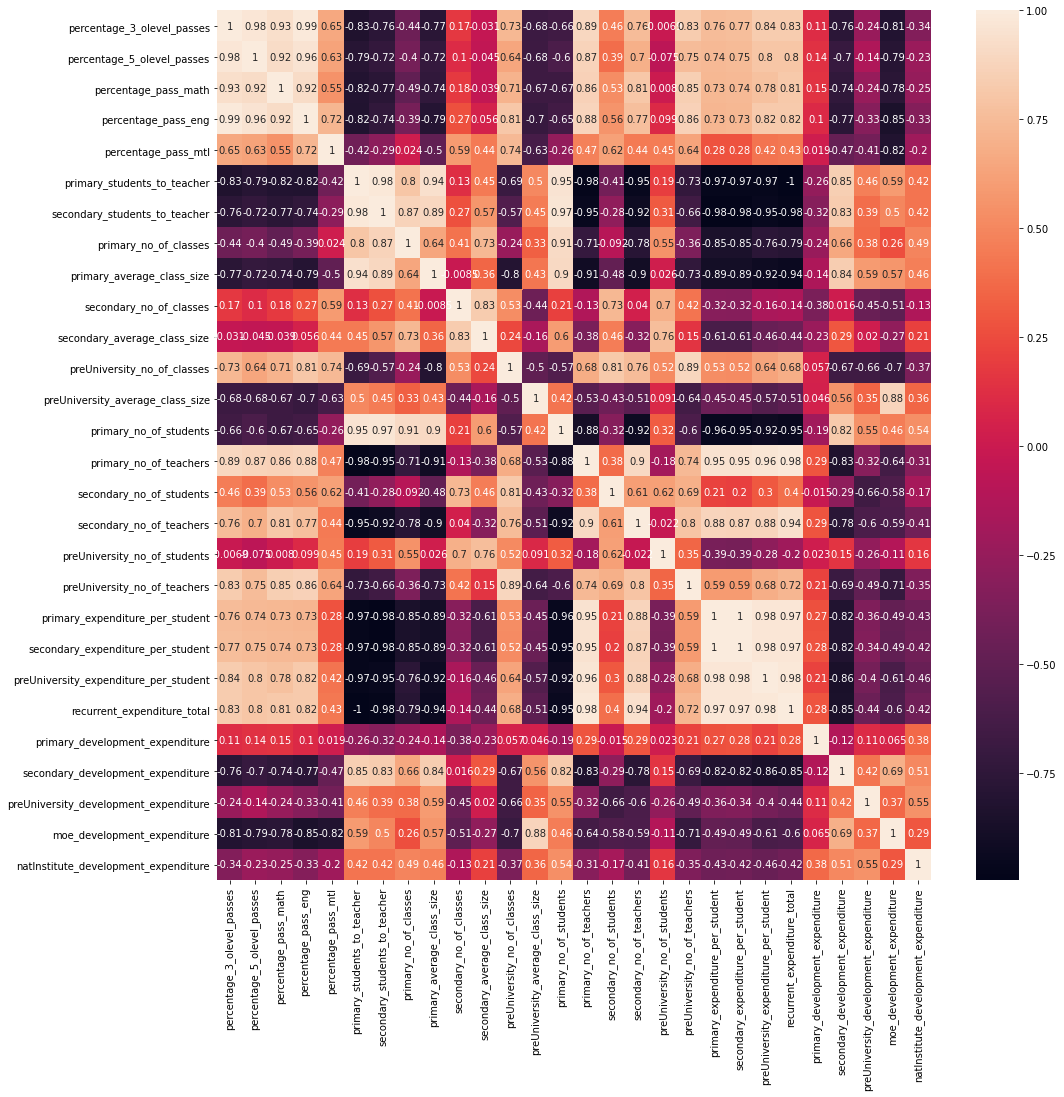

In [44]:
sgecorr = df_sge.corr()

#increase plot size for readability
fig, ax = plt.subplots(figsize=(16,16))

#plot the correlation heatmap
sns.heatmap(sgecorr, xticklabels=sgecorr.columns, yticklabels=sgecorr.columns, annot = True, ax=ax)

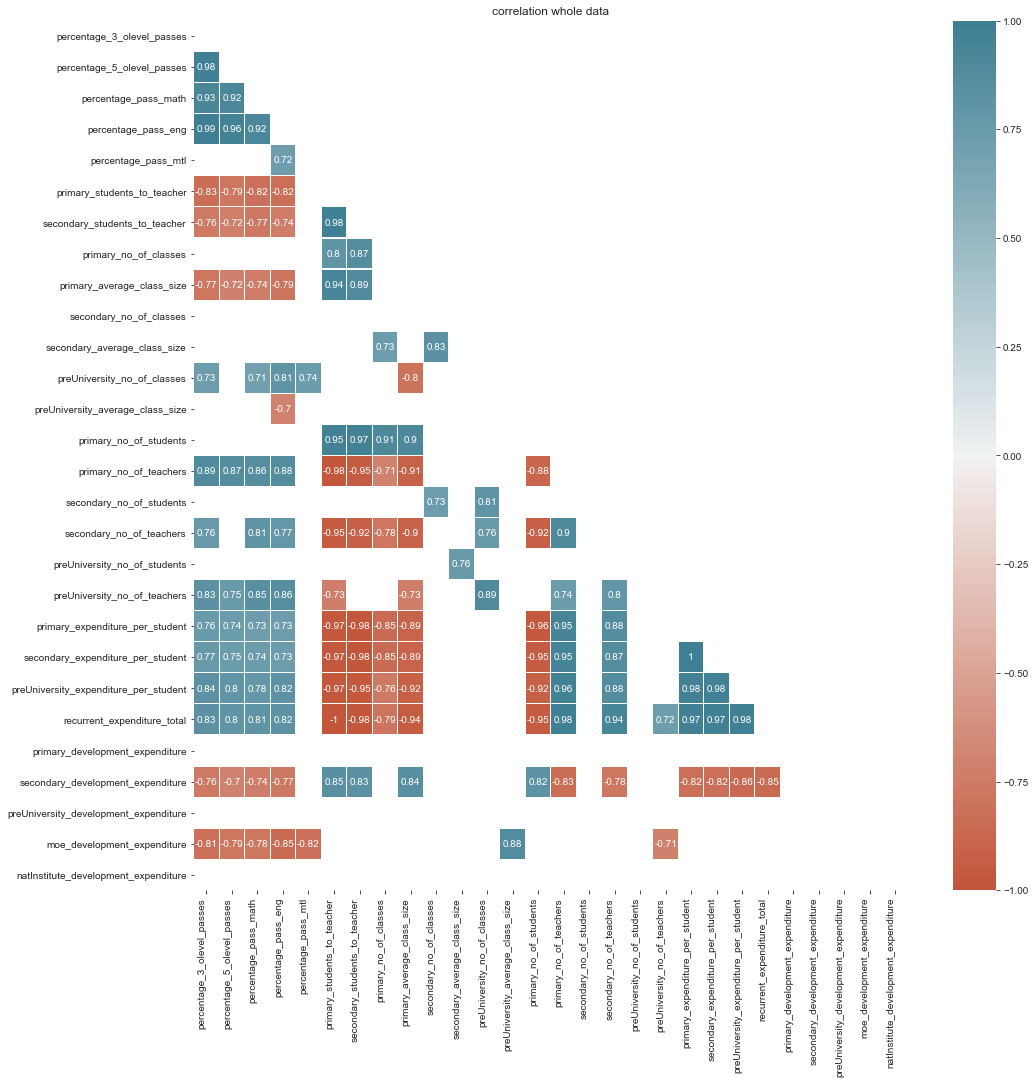

In [86]:
plt.figure(figsize = (16,16))
plt.title('correlation whole data')
sgecorr = df_sge.corr()
matrix = np.triu(sgecorr)
ax = sns.heatmap(
    sgecorr[(sgecorr >= 0.7) | (sgecorr <= -0.7)],
    #sgecorr,
    vmin=-1, vmax=1, center=0, linewidths=0.1,
    cmap=sns.diverging_palette(20, 220, n=200),
    #cmap="YlGnBu",
    square=False,
    annot=True,
    annot_kws={"size": 10},
    mask=matrix
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    #rotation=45,
    horizontalalignment='right'
);

<AxesSubplot:>

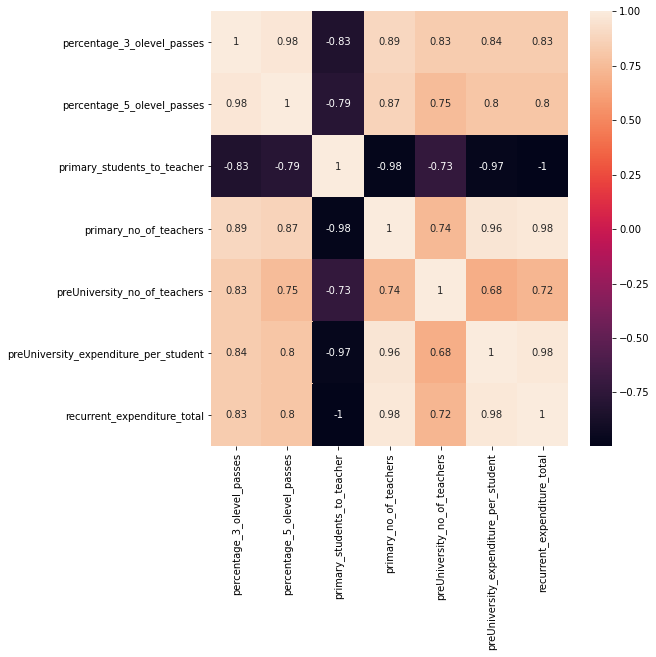

In [45]:
#create heatmap using only correlation above 0.8 threshold
df_sge2 = df_sge[['percentage_3_olevel_passes',
                  'percentage_5_olevel_passes', 
                  'primary_students_to_teacher', 
                  'primary_no_of_teachers',
                  'preUniversity_no_of_teachers',
                  'preUniversity_expenditure_per_student',
                  'recurrent_expenditure_total' ]].copy()

sgecorr2 = df_sge2.corr()

#plot size for readability
fig, ax = plt.subplots(figsize=(8,8))

#plot the correlation heatmap
sns.heatmap(sgecorr2, xticklabels=sgecorr2.columns, yticklabels=sgecorr2.columns, annot= True, ax=ax)

C:\Users\Swill\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Swill\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


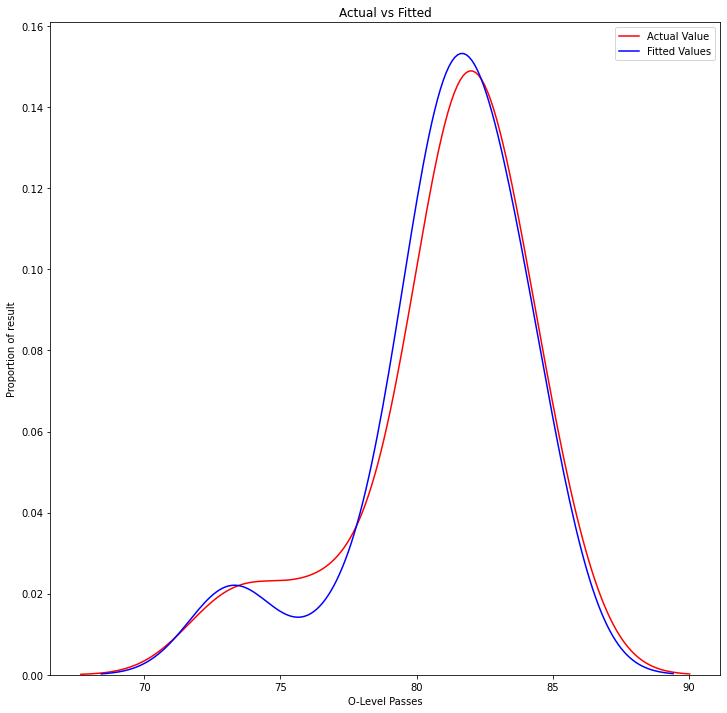

In [46]:
#develop Linear Regression model using chosen factors
Z = df_sge2[['primary_students_to_teacher',
             'primary_no_of_teachers',
             'preUniversity_no_of_teachers',
             'preUniversity_expenditure_per_student',
             'recurrent_expenditure_total']]

#ordinary least squares LinearRegression
lm = LinearRegression()

#fit model using chosen factors to target
lm.fit(Z, df_sge2['percentage_5_olevel_passes'])

#calculate coefficient and intercept
lm.intercept_
lm.coef_

#calculate prediction
Y_hat = lm.predict(Z)

#size plot
plt.figure(figsize=(12,12))

#combine distribution plots
ax1 = sns.distplot(df_sge2['percentage_5_olevel_passes'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values", ax=ax1)

#plot labelling
plt.title('Actual vs Fitted')
plt.xlabel('O-Level Passes')
plt.ylabel('Proportion of result')
plt.legend()

#display plot
plt.show()
plt.close()


In [47]:
print('The R-square is: ', lm.score(Z, df_sge2['percentage_5_olevel_passes']))

The R-square is:  0.9086928790511735


## Primary Students to Teacher
5 O-level Passes

Primary Student to Teacher correlation to Percentage of 5 O-level passes
The Pearson Correlation Coefficient is -0.7882494809068182  with a P-value of P =  7.93901143835567e-06


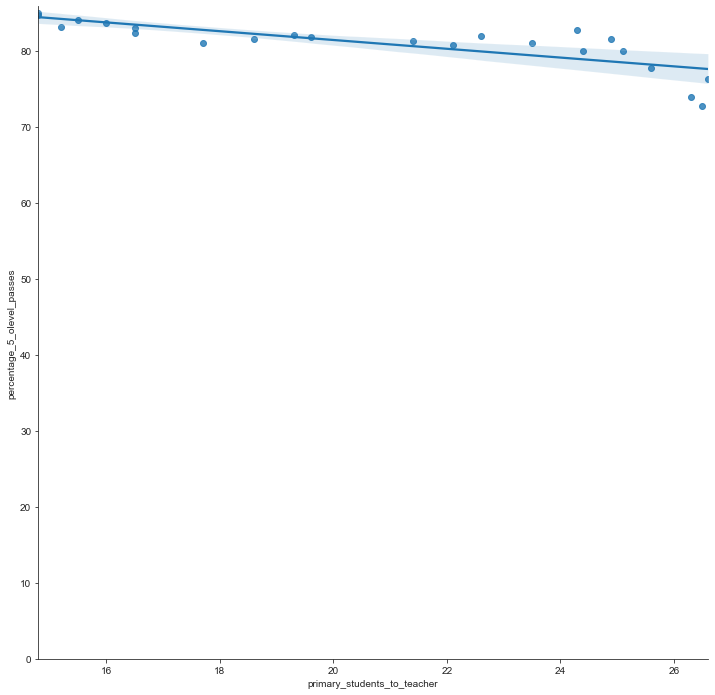

In [48]:
#plot styling for readability
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
sns.despine()

#show linear regression primary expenditure as potential predictor variable of 5 olevel passes
sns.regplot(x='primary_students_to_teacher', y='percentage_5_olevel_passes', data=df_sge, ax=ax)
plt.ylim(0,)

#calculate P-value
pearson_coef, p_value = stats.pearsonr(df_sge['primary_students_to_teacher'], df_sge['percentage_5_olevel_passes'])
print("Primary Student to Teacher correlation to Percentage of 5 O-level passes")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

## Primary Students to Teacher
3 O-level Passes

Primary Student to Teacher correlation to Percentage of 3 O-level passes
The Pearson Correlation Coefficient is -0.8285215248445762  with a P-value of P =  1.0479574420567118e-06


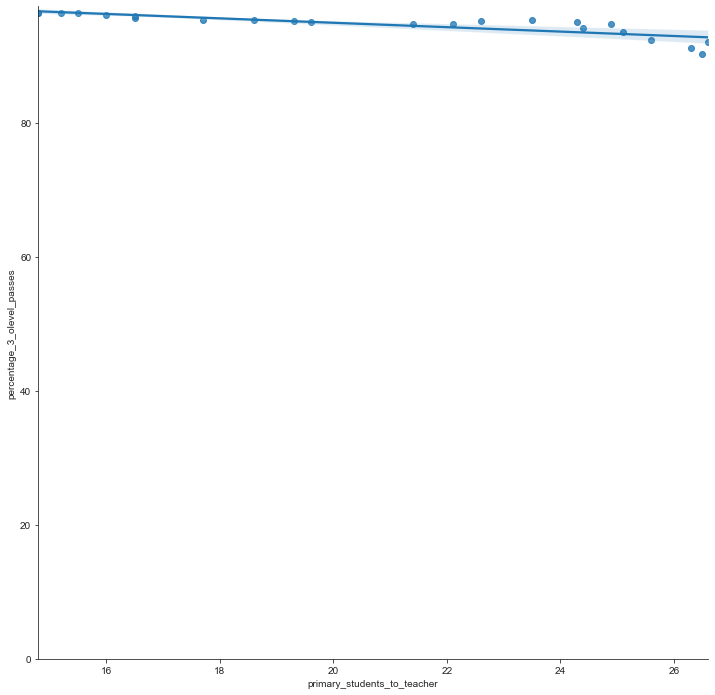

In [49]:
#plot styling for readability
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
sns.despine()

#show linear regression primary expenditure as potential predictor variable of 5 olevel passes
sns.regplot(x='primary_students_to_teacher', y='percentage_3_olevel_passes', data=df_sge, ax=ax)
plt.ylim(0,)

#calculate P-value
pearson_coef, p_value = stats.pearsonr(df_sge['primary_students_to_teacher'], df_sge['percentage_3_olevel_passes'])
print("Primary Student to Teacher correlation to Percentage of 3 O-level passes")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

## Primary Number of Teachers
5 O-level Passes

Primary number of Teachers correlation to Percentage of 5 O-level passes
The Pearson Correlation Coefficient is 0.8730743492558297  with a P-value of P =  5.470023308131437e-08


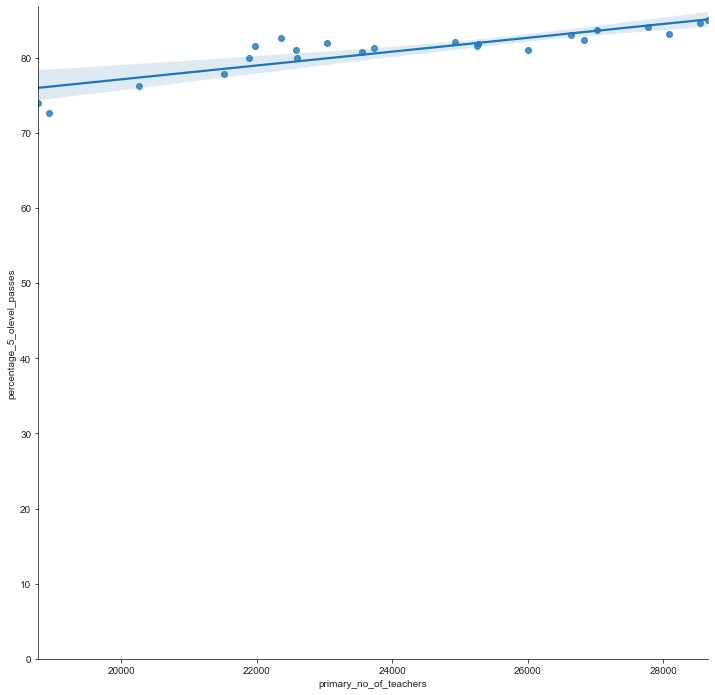

In [50]:
#plot styling for readability
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
sns.despine()

#show linear regression primary expenditure as potential predictor variable of 5 olevel passes
sns.regplot(x='primary_no_of_teachers', y='percentage_5_olevel_passes', data=df_sge, ax=ax)
plt.ylim(0,)

#calculate P-value
pearson_coef, p_value = stats.pearsonr(df_sge['primary_no_of_teachers'], df_sge['percentage_5_olevel_passes'])
print("Primary number of Teachers correlation to Percentage of 5 O-level passes")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

## Primary Number of Teachers
3 O-level Passes

Primary number of Teachers correlation to Percentage of 3 O-level passes
The Pearson Correlation Coefficient is 0.892794162247215  with a P-value of P =  1.0164781349918527e-08


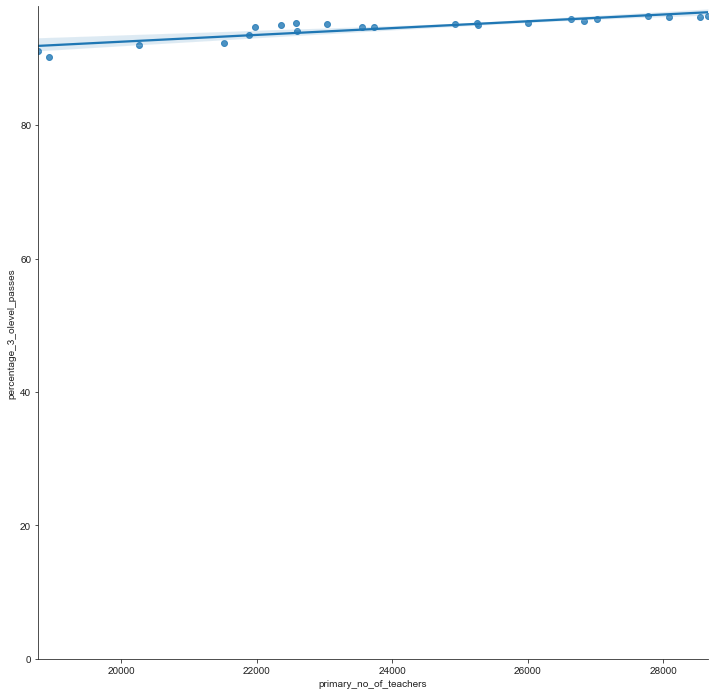

In [51]:
#plot styling for readability
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
sns.despine()

#show linear regression primary expenditure as potential predictor variable of 5 olevel passes
sns.regplot(x='primary_no_of_teachers', y='percentage_3_olevel_passes', data=df_sge, ax=ax)
plt.ylim(0,)

#calculate P-value
pearson_coef, p_value = stats.pearsonr(df_sge['primary_no_of_teachers'], df_sge['percentage_3_olevel_passes'])
print("Primary number of Teachers correlation to Percentage of 3 O-level passes")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

## Pre-University Number of Teachers
5 O-level Passes

Pre-University Number of Teachers correlation to Percentage of 5 O-level passes
The Pearson Correlation Coefficient is 0.7542097151775875  with a P-value of P =  3.225416347539982e-05


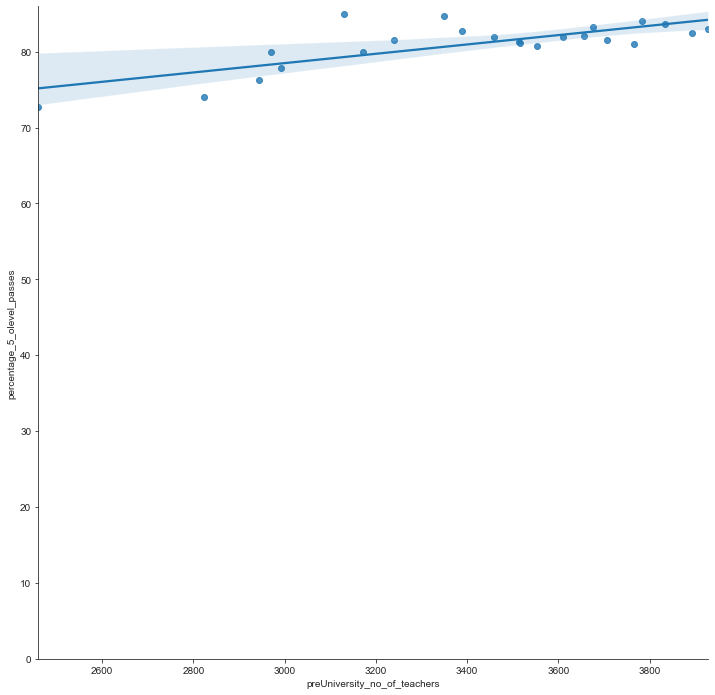

In [52]:
#plot styling for readability
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
sns.despine()

#show linear regression primary expenditure as potential predictor variable of 5 olevel passes
sns.regplot(x='preUniversity_no_of_teachers', y='percentage_5_olevel_passes', data=df_sge, ax=ax)
plt.ylim(0,)

#calculate P-value
pearson_coef, p_value = stats.pearsonr(df_sge['preUniversity_no_of_teachers'], df_sge['percentage_5_olevel_passes'])
print("Pre-University Number of Teachers correlation to Percentage of 5 O-level passes")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

## Pre-University Number of Teachers
3 O-level Passes

Pre-University Number of Teachers correlation to Percentage of 3 O-level passes
The Pearson Correlation Coefficient is 0.8340862284552193  with a P-value of P =  7.606673112644153e-07


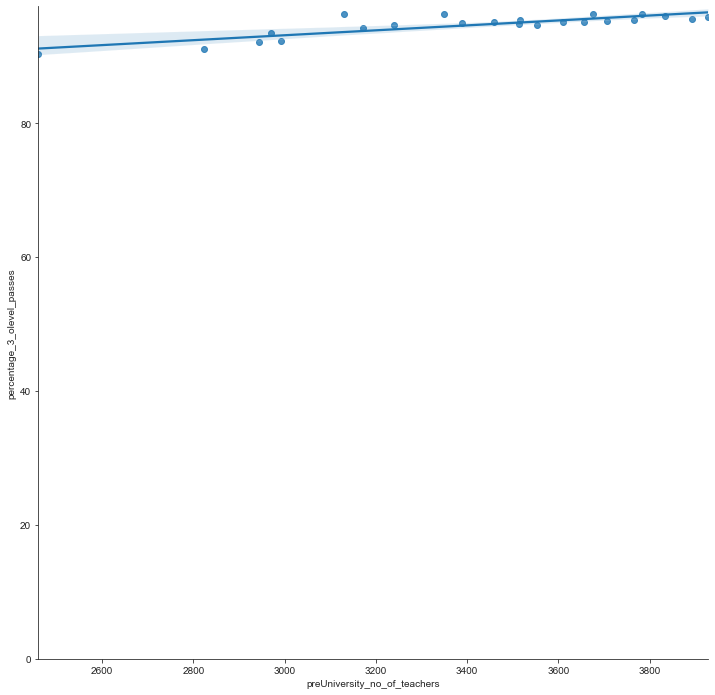

In [53]:
#plot styling for readability
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
sns.despine()

#show linear regression primary expenditure as potential predictor variable of 5 olevel passes
sns.regplot(x='preUniversity_no_of_teachers', y='percentage_3_olevel_passes', data=df_sge, ax=ax)
plt.ylim(0,)

#calculate P-value
pearson_coef, p_value = stats.pearsonr(df_sge['preUniversity_no_of_teachers'], df_sge['percentage_3_olevel_passes'])
print("Pre-University Number of Teachers correlation to Percentage of 3 O-level passes")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

## Pre-University Expenditure per Student
5 O-level Passes

Pre-University Expenditure per Student correlation to Percentage of 5 O-level passes
The Pearson Correlation Coefficient is 0.8035033621705708  with a P-value of P =  3.892933794650111e-06


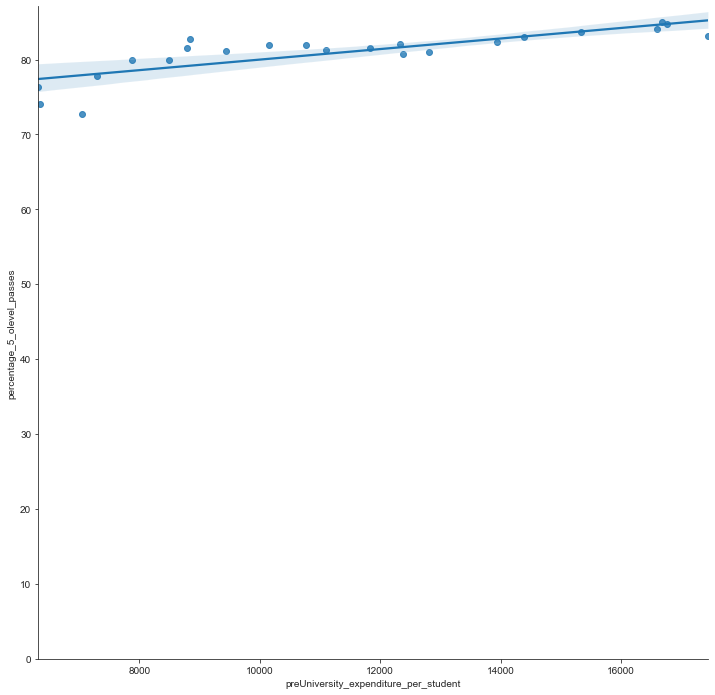

In [54]:
#plot styling for readability
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
sns.despine()

#show linear regression primary expenditure as potential predictor variable of 5 olevel passes
sns.regplot(x='preUniversity_expenditure_per_student', y='percentage_5_olevel_passes', data=df_sge, ax=ax)
plt.ylim(0,)

#calculate P-value
pearson_coef, p_value = stats.pearsonr(df_sge['preUniversity_expenditure_per_student'], df_sge['percentage_5_olevel_passes'])
print("Pre-University Expenditure per Student correlation to Percentage of 5 O-level passes")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

## Pre-University Expenditure per Student
3 O-level Passes

Pre-University Expenditure per Student correlation to Percentage of 3 O-level passes
The Pearson Correlation Coefficient is 0.8358540103277097  with a P-value of P =  6.853724230239774e-07


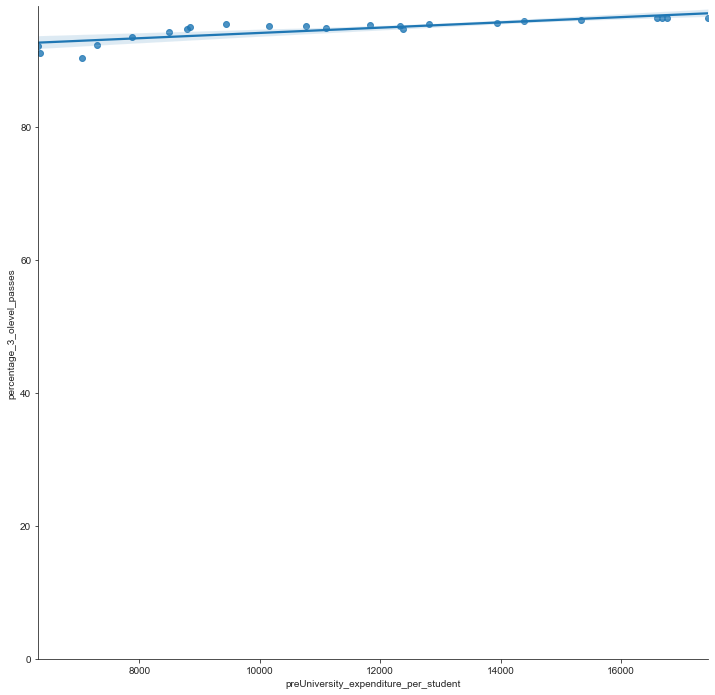

In [55]:
#plot styling for readability
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
sns.despine()

#show linear regression primary expenditure as potential predictor variable of 5 olevel passes
sns.regplot(x='preUniversity_expenditure_per_student', y='percentage_3_olevel_passes', data=df_sge, ax=ax)
plt.ylim(0,)

#calculate P-value
pearson_coef, p_value = stats.pearsonr(df_sge['preUniversity_expenditure_per_student'], df_sge['percentage_3_olevel_passes'])
print("Pre-University Expenditure per Student correlation to Percentage of 3 O-level passes")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

## Recurrent Expenditure Total
5 O-level Passes

Recurrent Expenditure Total correlation to Percentage of 5 O-level passes
The Pearson Correlation Coefficient is 0.798103554741044  with a P-value of P =  5.044231543768054e-06


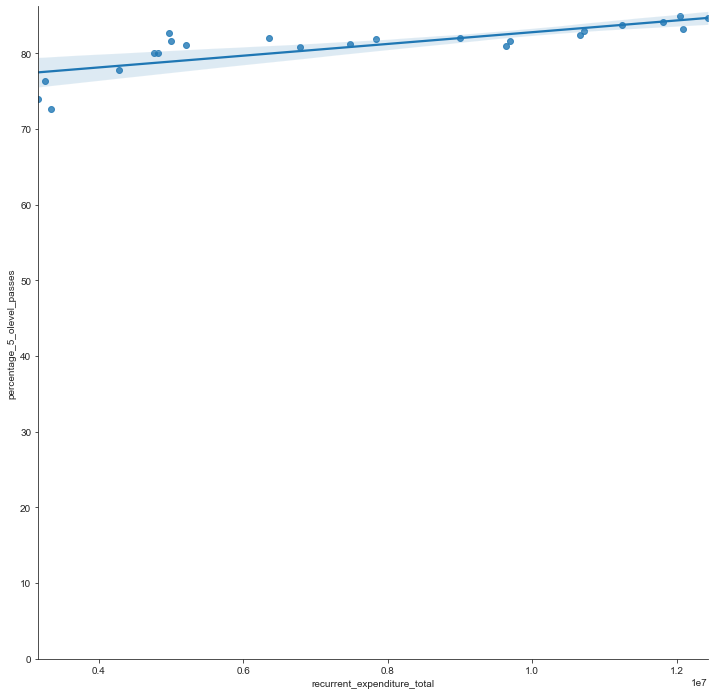

In [56]:
#plot styling for readability
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
sns.despine()

#show linear regression primary expenditure as potential predictor variable of 5 olevel passes
sns.regplot(x='recurrent_expenditure_total', y='percentage_5_olevel_passes', data=df_sge, ax=ax)
plt.ylim(0,)

#calculate P-value
pearson_coef, p_value = stats.pearsonr(df_sge['recurrent_expenditure_total'], df_sge['percentage_5_olevel_passes'])
print("Recurrent Expenditure Total correlation to Percentage of 5 O-level passes")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

## Recurrent Expenditure Total
3 O-level Passes

Recurrent Expenditure Total correlation to Percentage of 3 O-level passes
The Pearson Correlation Coefficient is 0.830560998737042  with a P-value of P =  9.33088907086648e-07


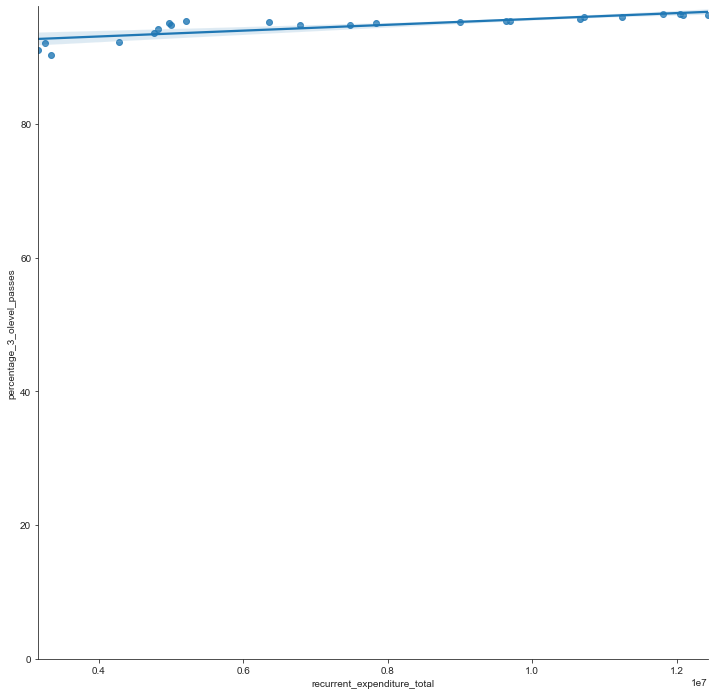

In [57]:
#plot styling for readability
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
sns.despine()

#show linear regression primary expenditure as potential predictor variable of 5 olevel passes
sns.regplot(x='recurrent_expenditure_total', y='percentage_3_olevel_passes', data=df_sge, ax=ax)
plt.ylim(0,)

#calculate P-value
pearson_coef, p_value = stats.pearsonr(df_sge['recurrent_expenditure_total'], df_sge['percentage_3_olevel_passes'])
print("Recurrent Expenditure Total correlation to Percentage of 3 O-level passes")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

## Poor Linear models
Run to confirm and show poor/bad models.
Technically Pearson Correlation Coefficient is above required threshold although plot clearly shows significant cluster and hence poor distribution.

## MOE Development Expenditure
5 O-level Passes

MOE Development Expenditure correlation to Percentage of 5 O-level passes
The Pearson Correlation Coefficient is -0.7872500715730189  with a P-value of P =  8.301772436704583e-06


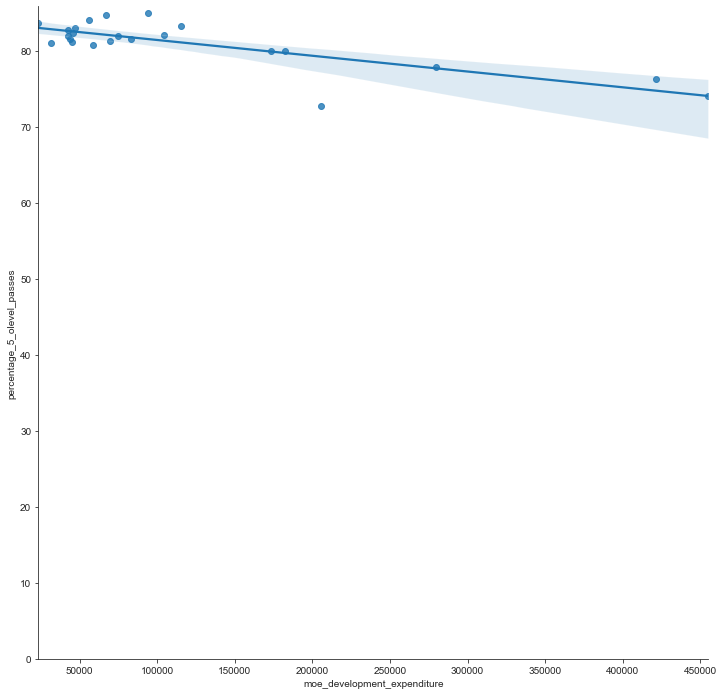

In [58]:
#plot styling for readability
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
sns.despine()

#show linear regression primary expenditure as potential predictor variable of 5 olevel passes
sns.regplot(x='moe_development_expenditure', y='percentage_5_olevel_passes', data=df_sge, ax=ax)
plt.ylim(0,)

#calculate P-value
pearson_coef, p_value = stats.pearsonr(df_sge['moe_development_expenditure'], df_sge['percentage_5_olevel_passes'])
print("MOE Development Expenditure correlation to Percentage of 5 O-level passes")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

## MOE Development Expenditure
3 O-level Passes

MOE Development Expenditure correlation to Percentage of 3 O-level passes
The Pearson Correlation Coefficient is -0.8096656989917144  with a P-value of P =  2.8682465014547164e-06


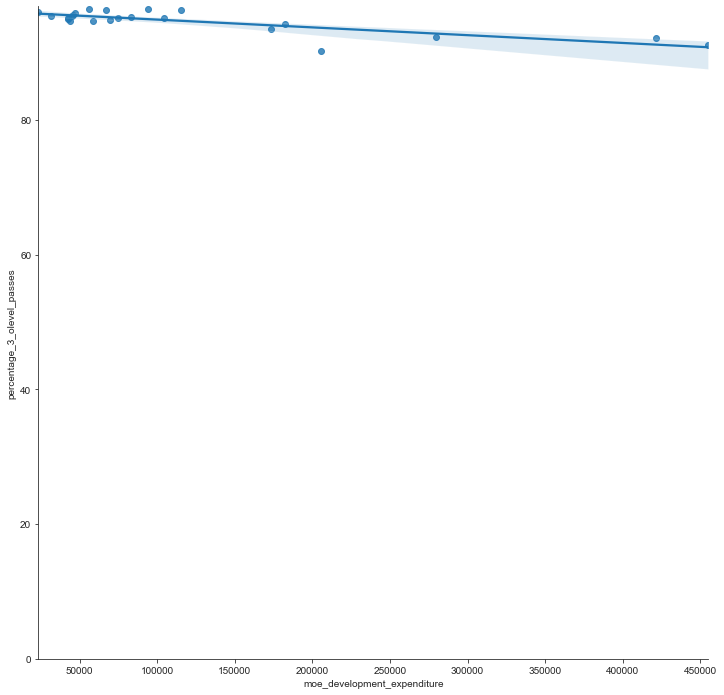

In [59]:
#plot styling for readability
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
sns.despine()

#show linear regression primary expenditure as potential predictor variable of 5 olevel passes
sns.regplot(x='moe_development_expenditure', y='percentage_3_olevel_passes', data=df_sge, ax=ax)
plt.ylim(0,)

#calculate P-value
pearson_coef, p_value = stats.pearsonr(df_sge['moe_development_expenditure'], df_sge['percentage_3_olevel_passes'])
print("MOE Development Expenditure correlation to Percentage of 3 O-level passes")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)